# Muon Separator Data Exploration

In this notebook we explore the voltage signal. This data was sampled with the frequencey at 1000Hz and the number of elements at 100 so the DAQ sent new information to the IOC every 0.1 seconds.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

from src.data_processing import clean_data, create_data_from_entry, load_data

%matplotlib inline

## Cleaning the data

The raw data take the following form:

- Column 0: Time since EPOCH the reading was taken given by the python collection script `Muon-data-logger.py`.
- Column 1-100: Data from the `DAQ:_RAW` record. The readings are the DAQ voltage readings. These readings were requested every 0.05 seconds by the python script collecting the data from the IOC.

In [2]:
raw = pd.read_csv("data\\raw\\muon_results.csv", nrows=100000, header=None)

We now we clean the data up.

In [3]:
signal = clean_data(raw)

In [4]:
signal.head()

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,Time
0,4.518552,4.450329,4.418448,4.399958,4.232905,4.364889,4.349268,4.384018,4.372859,4.489223,...,4.583588,4.619294,4.657232,4.733744,4.664564,4.699314,4.683055,4.667433,4.580400,2018-09-21 16:56:48.930999994
2,4.662333,4.594428,4.530986,4.521740,4.437258,4.376048,4.420680,4.308780,4.335241,4.349268,...,4.443634,4.479021,4.523972,4.572749,4.621207,4.601122,4.675722,4.678910,4.640973,2018-09-21 16:56:49.041000128
8,4.574343,4.545651,4.414623,4.446503,4.410478,4.276900,4.364252,4.322807,4.329821,4.408565,...,4.487310,4.581038,4.601760,4.649262,4.719398,4.696445,4.677954,4.710791,4.597616,2018-09-21 16:56:49.367999792
13,4.467225,4.557128,4.540231,4.637466,4.605267,4.711109,4.667433,4.705371,4.678273,4.630452,...,4.495280,4.479658,4.398364,4.403146,4.286783,4.359789,4.301766,4.342573,4.410478,2018-09-21 16:56:49.640000105
18,4.386568,4.472645,4.553302,4.616744,4.628539,4.760205,4.666477,4.698039,4.673172,4.654681,...,4.534811,4.435664,4.408565,4.401552,4.286145,4.342892,4.349268,4.333966,4.378279,2018-09-21 16:56:49.912999868


In [5]:
signal.shape

(19022, 101)



## Ploting the data

The way we pull out the voltage reading from the array is just selecting the first element (column 1). Lets plot the values we get here againist time.

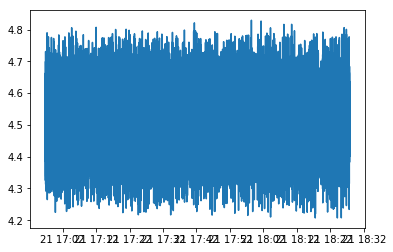

In [6]:
plt.plot(signal["Time"], signal[1])

Plotting the first 100 samples from the first column gives us

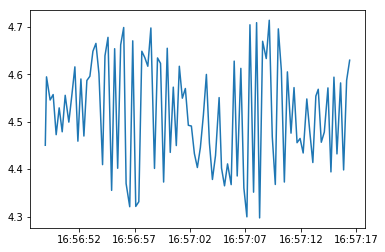

In [7]:
plt.plot(signal["Time"][:100], signal.iloc[:100, 1])

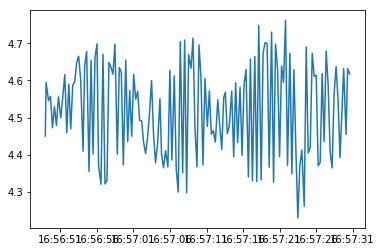

In [8]:
plt.plot(signal["Time"][:150], signal.iloc[:150, 1])

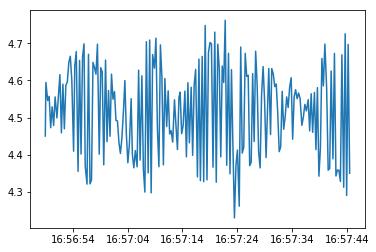

In [9]:
plt.plot(signal["Time"][:200], signal.iloc[:200, 1])

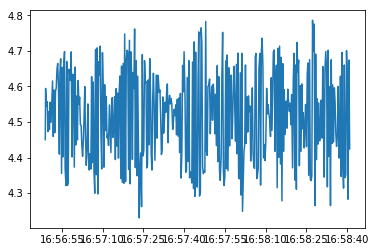

In [10]:
plt.plot(signal["Time"][:400], signal.iloc[:400, 1])

## Using all the data in one row

Now we will try to use all the data to plot 1 second worth of time (first 10 rows). To do this we need to give the extra entries in the array time stamps. We will do this using the sampling frequency of 1000Hz to generate time stamps which are 0.001 larger than the previous one.

In [11]:
first_tenth_second = create_data_from_entry(0, signal)
first_tenth_second.head()

,1,Time
0,4.518552,2018-09-21 16:56:48.930999994
1,4.450329,2018-09-21 16:56:48.931999994
2,4.418448,2018-09-21 16:56:48.932999994
3,4.399958,2018-09-21 16:56:48.933999994
4,4.232905,2018-09-21 16:56:48.934999994


In [12]:
first_tenth_second.tail()

,1,Time
95,4.664564,2018-09-21 16:56:49.025999994
96,4.699314,2018-09-21 16:56:49.026999994
97,4.683055,2018-09-21 16:56:49.027999994
98,4.667433,2018-09-21 16:56:49.028999994
99,4.580400,2018-09-21 16:56:49.029999994


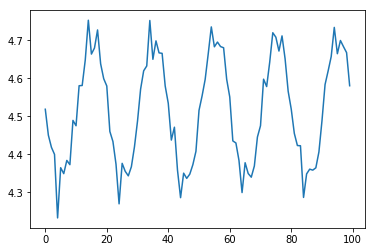

In [13]:
plt.plot(first_tenth_second.index, first_tenth_second[1])

Lets look at the seond tenth of a second of data

In [14]:
second_tenth_second = create_data_from_entry(1, signal)
second_tenth_second.head()

,1,Time
0,4.662333,2018-09-21 16:56:49.041000128
1,4.594428,2018-09-21 16:56:49.042000128
2,4.530986,2018-09-21 16:56:49.043000128
3,4.521740,2018-09-21 16:56:49.044000128
4,4.437258,2018-09-21 16:56:49.045000128


In [15]:
second_tenth_second.tail()

,1,Time
95,4.621207,2018-09-21 16:56:49.136000128
96,4.601122,2018-09-21 16:56:49.137000128
97,4.675722,2018-09-21 16:56:49.138000128
98,4.678910,2018-09-21 16:56:49.139000128
99,4.640973,2018-09-21 16:56:49.140000128


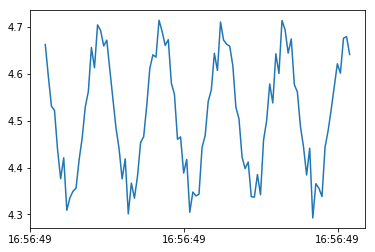

In [16]:
plt.plot(second_tenth_second["Time"], second_tenth_second[1])

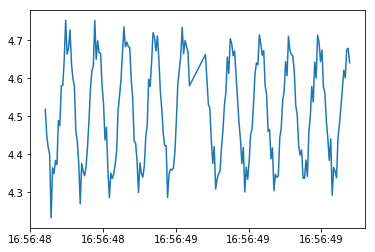

In [17]:
two_tenths_of_seconds = pd.concat([first_tenth_second, second_tenth_second])
plt.plot(two_tenths_of_seconds["Time"], two_tenths_of_seconds[1])

That is a large gap between the two plots in the middle of the graph.

In general though, it looks like the signal has a 50Hz componenet.

## Using 1 second of data

Now want to do this for 1 second of data.

In [18]:
dataframes_to_join = []

for i in range(0, 10):
    tenth_of_a_second = create_data_from_entry(i, signal)
    dataframes_to_join.append(tenth_of_a_second)

second_of_data = pd.concat(dataframes_to_join)

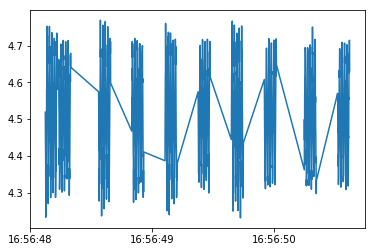

In [19]:
plt.plot(second_of_data["Time"], second_of_data[1])

It looks like there are large gaps between the 3rd, 4th etc rows. This is probably due to the timestamps being generated by python and not the EPICS timestamps.